# Regridding CMIP6 to Common GLORYSs 1/12th Degree Grid

This is a port of `Regrid_script.py`, which was originally used for regridding to OISST & SODA reference grids. The approach used climate data operator (cdo) tools to perform a batch regridding on files stored in `RawTmpFiles/` directory. After this step CMIP6 files gain a prefix `GlorysGrid__` which indicates that they are on a standard grid

In [13]:
import cdo              # for the cdo tools
import glob             # for file listing
import xarray as xr     # for netcdfs
import numpy as np      # array tools
import fcts             # local functions
import os
import cftime
import xesmf as xe

# need to initialize a cdo object
cdo = cdo.Cdo()     

In [14]:
# User info for paths to data and for exporting:
UsrName          = 'adamkemberling'
Group            = 'RES_Data'

# Scenario Details
Experiment       = 'ssp585'
Folder           = 'CMIP6/'
ExperimentFolder = 'CMIP6/SSP5_85/'

# # Set up paths - if fcts works
# CMIPpath = fcts.shared_path(user_name = UsrName, group = Group, folder = Folder)
#ExperimentPath = fcts.shared_path(user_name = UsrName, group = Group, folder = ExperimentFolder)

# Or manually set them if they are known
CMIPpath       = "/Users/{UsrName}/Library/CloudStorage/Box-Box/RES_Data/CMIP6/"
ExperimentPath = "/Users/{UsrName}/Library/CloudStorage/Box-Box/RES_Data/CMIP6/SSP5_85/"
HistoricalPath = "/Users/{UsrName}/Library/CloudStorage/Box-Box/RES_Data/CMIP6/Historical/"
glorys_path    = "/Users/{UsrName}/Library/CloudStorage/Box-Box/RES_Data/GLORYs/NW_Atl_MonthlyTemps/"

In [15]:
# Load the reference grid we want to regrid to
glorys_grid = f"{glorys_path}Climatology1993to2023.nc"
glorys_clim = xr.open_dataset(glorys_grid)
#glorys_clim.isel(month = 0).surf_temp.plot()


## Map a Dataset to Check Extent

In [16]:
# Are the original grids of smaller extent before the regrid?
# dsTOS     = glob.glob(f'{ExperimentPath}RawTmpFiles/tos*_{Experiment}*') # SSP Scenario List
# dsTOS     = glob.glob(f'{HistoricalPath}RawTmpFiles/tos*_historical*') # Historical List
# orig_grid = dsTOS[0]
# orig_ds   = xr.open_dataset(orig_grid)
# orig_ds.isel(time = -1).tos.plot()  

## Regrid TOS

Starting with files for the variable tos

In [ ]:
dsTOS = glob.glob(f'{ExperimentPath}RawTmpFiles/tos*_{Experiment}*')
#dsTOS = glob.glob(f'{HistoricalPath}RawTmpFiles/tos*_historical*')

# Loop through each file
for file in dsTOS:
    gridfi        = glorys_grid
    base_filename = os.path.basename(file)
    fileout       = f'{ExperimentPath}SST/tmpfiles/GlorysGrid_{base_filename}'
    cdo.remapdis(
        gridfi,  
        input = file, 
        output = fileout, 
        options = '-f nc')
    
    # Open the regridded file
    ds       = xr.open_dataset(fileout)
    savepath = f'{ExperimentPath}SST/GlorysGrid/GlorysGrid_{base_filename}'
    
    # Crop it? should have been done in `CMIP6_FromMD`
    ds_cropped = ds
    
    # Resave it, if it needs to
    fileExists = os.path.exists(savepath)
    if fileExists:
        print(f"Skipping {base_filename} as it already exists.")
        os.remove(fileout)
        continue
    ds_cropped.to_netcdf(savepath)
    os.remove(fileout)
    print(f'Completed regridding {base_filename} out of {str(len(dsTOS))}')

Skipping GlorysGrid_tos_NESM3_r1i1p1f1_ssp585.nc as it already exists.
Skipping GlorysGrid_tos_IPSL-CM6A-LR_r1i1p1f1_ssp585.nc as it already exists.
Skipping GlorysGrid_tos_CIESM_r1i1p1f1_ssp585.nc as it already exists.
Skipping GlorysGrid_tos_NorESM2-LM_r1i1p1f1_ssp585.nc as it already exists.
Skipping GlorysGrid_tos_NorESM2-MM_r1i1p1f1_ssp585.nc as it already exists.
Skipping GlorysGrid_tos_FGOALS-f3-L_r1i1p1f1_ssp585.nc as it already exists.
Skipping GlorysGrid_tos_CanESM5_r1i1p2f1_ssp585.nc as it already exists.
Skipping GlorysGrid_tos_CNRM-ESM2-1_r4i1p1f2_ssp585.nc as it already exists.
Skipping GlorysGrid_tos_FGOALS-g3_r1i1p1f1_ssp585.nc as it already exists.
Skipping GlorysGrid_tos_MRI-ESM2-0_r1i1p1f1_ssp585.nc as it already exists.
Skipping GlorysGrid_tos_MIROC6_r1i1p1f1_ssp585.nc as it already exists.
Skipping GlorysGrid_tos_CNRM-CM6-1_r1i1p1f2_ssp585.nc as it already exists.
Skipping GlorysGrid_tos_UKESM1-0-LL_r1i1p1f2_ssp585.nc as it already exists.
Skipping GlorysGrid_tos_G

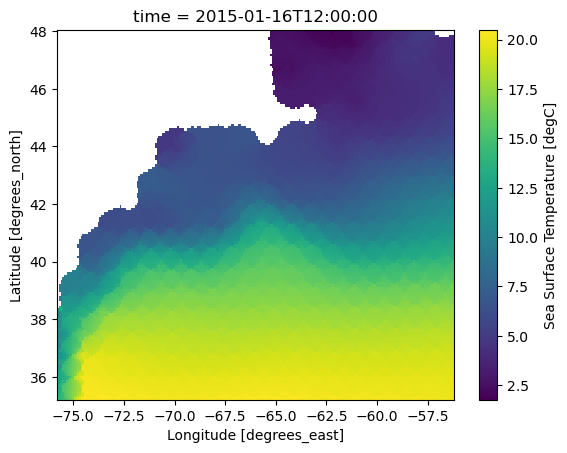

In [18]:
# What does one look like
ds_name = os.listdir(f"{ExperimentPath}SST/GlorysGrid")[1]
ds_test = xr.open_dataset(f"{ExperimentPath}SST/GlorysGrid/{ds_name}")
ds_test.isel(time = 0).tos.plot()

## Regrid Thetao

In [19]:
dsThetao = glob.glob(f'{ExperimentPath}RawTmpFiles/thetao*_{Experiment}*')
# dsThetao = glob.glob(f'{HistoricalPath}RawTmpFiles/thetao*_historical*')

## Completed regridding thetao_MRI-ESM2-0_r1i1p1f1_ssp126.nc out of 26 need to find more space to run on box
for file in dsThetao:
    gridfi        = glorys_grid
    base_filename = os.path.basename(file)
    fileout = f'{ExperimentPath}BottomT/tmpfiles/GlorysGrid_{base_filename}'

    cdo.remapdis(
        gridfi,  
        input=file, 
        output=fileout, 
        options='-f nc')

    # Open the regridded file
    ds       = xr.open_dataset(fileout, decode_times=False)
    savepath = f'{ExperimentPath}BottomT/GlorysGrid/GlorysGrid_{base_filename}'
    
    # Crop it? should have been done in `CMIP6_FromMD`
    ds_cropped = ds
    #ds_cropped   = ds.sel(lon=slice(260, 320), lat=slice(20, 70))
    
    # Resave it, if it needs to
    fileExists = os.path.exists(savepath)
    if fileExists:
        print(f"Skipping {base_filename} as it already exists.")
        os.remove(fileout)
        continue
    ds_cropped.to_netcdf(savepath)
    os.remove(fileout)
    print(f'Completed regridding {base_filename} out of {str(len(dsThetao))}')

Skipping GlorysGrid_thetao_FIO-ESM-2-0_r1i1p1f1_ssp585.nc as it already exists.
Skipping GlorysGrid_thetao_FGOALS-g3_r1i1p1f1_ssp585.nc as it already exists.
Skipping GlorysGrid_thetao_CESM2-WACCM_r1i1p1f1_ssp585.nc as it already exists.
Skipping GlorysGrid_thetao_MRI-ESM2-0_r1i1p1f1_ssp585.nc as it already exists.
Skipping GlorysGrid_thetao_CNRM-CM6-1_r1i1p1f2_ssp585.nc as it already exists.
Skipping GlorysGrid_thetao_NorESM2-LM_r1i1p1f1_ssp585.nc as it already exists.
Skipping GlorysGrid_thetao_IPSL-CM6A-LR_r1i1p1f1_ssp585.nc as it already exists.
Skipping GlorysGrid_thetao_NorESM2-MM_r1i1p1f1_ssp585.nc as it already exists.
Skipping GlorysGrid_thetao_EC-Earth3-Veg-LR_r1i1p1f1_ssp585.nc as it already exists.
Skipping GlorysGrid_thetao_CanESM5-CanOE_r1i1p2f1_ssp585.nc as it already exists.
Skipping GlorysGrid_thetao_EC-Earth3-Veg_r1i1p1f1_ssp585.nc as it already exists.
Skipping GlorysGrid_thetao_FGOALS-f3-L_r1i1p1f1_ssp585.nc as it already exists.
Skipping GlorysGrid_thetao_CESM2_r4i

## Regrid So

In [20]:
dsSO = glob.glob(f'{ExperimentPath}RawTmpFiles/so*_{Experiment}*')


for file in dsSO:
    gridfi        = glorys_grid
    base_filename = os.path.basename(file)
    fileout = f'{ExperimentPath}BottomSal/tmpfiles/GlorysGrid_{base_filename}'

    cdo.remapdis(
        gridfi,  
        input=file, 
        output=fileout, 
        options='-f nc')
        
    # Open the regridded file
    ds       = xr.open_dataset(fileout, decode_times=False)
    savepath = f'{ExperimentPath}BottomSal/GlorysGrid/GlorysGrid_{base_filename}'
    
    # Crop it? should have been done in `CMIP6_FromMD`
    ds_cropped = ds
    #ds_cropped   = ds.sel(lon=slice(260, 320), lat=slice(20, 70))
    
    # Resave it, if it needs to
    fileExists = os.path.exists(savepath)
    if fileExists:
        print(f"Skipping {base_filename} as it already exists.")
        os.remove(fileout)
        continue
    ds_cropped.to_netcdf(savepath)
    os.remove(fileout)
    print(f'Completed regridding {base_filename} out of {str(len(dsSO))}')

Skipping GlorysGrid_so_GISS-E2-1-G_r1i1p3f1_ssp585.nc as it already exists.
Skipping GlorysGrid_so_UKESM1-0-LL_r1i1p1f2_ssp585.nc as it already exists.
Skipping GlorysGrid_so_MIROC6_r10i1p1f1_ssp585.nc as it already exists.
Skipping GlorysGrid_so_CESM2_r10i1p1f1_ssp585.nc as it already exists.
Skipping GlorysGrid_so_FGOALS-f3-L_r1i1p1f1_ssp585.nc as it already exists.
Skipping GlorysGrid_so_INM-CM4-8_r1i1p1f1_ssp585.nc as it already exists.
Skipping GlorysGrid_so_CIESM_r1i1p1f1_ssp585.nc as it already exists.
Skipping GlorysGrid_so_INM-CM5-0_r1i1p1f1_ssp585.nc as it already exists.
Skipping GlorysGrid_so_NESM3_r1i1p1f1_ssp585.nc as it already exists.
Skipping GlorysGrid_so_EC-Earth3_r1i1p1f1_ssp585.nc as it already exists.
Skipping GlorysGrid_so_IPSL-CM6A-LR_r14i1p1f1_ssp585.nc as it already exists.
Skipping GlorysGrid_so_GFDL-CM4_r1i1p1f1_ssp585.nc as it already exists.
Skipping GlorysGrid_so_NorESM2-LM_r1i1p1f1_ssp585.nc as it already exists.
Skipping GlorysGrid_so_NorESM2-MM_r1i1p1f

## Regrid Surface SO

In [ ]:
dsSurSO = glob.glob(f'{ExperimentPath}RawTmpFiles/Surface*_{Experiment}*')


for file in dsSurSO:
    gridfi        = glorys_grid
    base_filename = os.path.basename(file)
    fileout = f'{ExperimentPath}SurSalinity/tmpfiles/GlorysGrid_{base_filename}'

    cdo.remapdis(
        gridfi,  
        input=file, 
        output=fileout, 
        options='-f nc')
    
    # Open the regridded file
    ds       = xr.open_dataset(fileout, decode_times=False)
    savepath = f'{ExperimentPath}SurSalinity/GlorysGrid/GlorysGrid_{base_filename}'
    
    # Crop it? should have been done in `CMIP6_FromMD`
    ds_cropped = ds
    #ds_cropped   = ds.sel(lon=slice(260, 320), lat=slice(20, 70))
    
    # Resave it, if it needs to
    fileExists = os.path.exists(savepath)
    if fileExists:
        print(f"Skipping {base_filename} as it already exists.")
        os.remove(fileout)
        continue
    ds_cropped.to_netcdf(savepath)
    os.remove(fileout)
    print(f'Completed regridding {base_filename} out of {str(len(dsSurSO))}')


Skipping GlorysGrid_Surface_so_INM-CM4-8_r1i1p1f1_ssp585.nc as it already exists.
Skipping GlorysGrid_Surface_so_INM-CM5-0_r1i1p1f1_ssp585.nc as it already exists.
Skipping GlorysGrid_Surface_so_EC-Earth3_r1i1p1f1_ssp585.nc as it already exists.
Skipping GlorysGrid_Surface_so_CNRM-ESM2-1_r1i1p1f2_ssp585.nc as it already exists.
Skipping GlorysGrid_Surface_so_MIROC-ES2L_r1i1p1f2_ssp585.nc as it already exists.
Skipping GlorysGrid_Surface_so_FIO-ESM-2-0_r1i1p1f1_ssp585.nc as it already exists.
Skipping GlorysGrid_Surface_so_CIESM_r1i1p1f1_ssp585.nc as it already exists.
Skipping GlorysGrid_Surface_so_NESM3_r1i1p1f1_ssp585.nc as it already exists.
Skipping GlorysGrid_Surface_so_CESM2-WACCM_r1i1p1f1_ssp585.nc as it already exists.
Skipping GlorysGrid_Surface_so_UKESM1-0-LL_r1i1p1f2_ssp585.nc as it already exists.
Skipping GlorysGrid_Surface_so_NorESM2-LM_r1i1p1f1_ssp585.nc as it already exists.
Skipping GlorysGrid_Surface_so_GISS-E2-1-G_r1i1p3f1_ssp585.nc as it already exists.
Skipping Glo

# Regridding the Historical Period Data

The historical datasets (1950-2014) are not scenario-dependent and only need to be done once. 

I've moved them down to the bottom to keep them isolated. I also separated them into their own directory to be consistent with the data for the different scenarios.

In [24]:
# TOS Historical datasets
hist_dsTOS = glob.glob(f'{HistoricalPath}RawTmpFiles/tos*_historical*')

# Loop through each file
for file in hist_dsTOS:
    gridfi        = glorys_grid
    base_filename = os.path.basename(file)
    fileout       = f'{HistoricalPath}SST/tmpfiles/GlorysGrid_{base_filename}'
    try:
        cdo.remapdis(
            gridfi,  
            input = file, 
            output = fileout, 
            options = '-f nc')
    except:
        print(f"Problem Regridding with {base_filename}.")
        continue

    
    # Open the regridded file
    ds       = xr.open_dataset(fileout)
    savepath = f'{HistoricalPath}SST/GlorysGrid/GlorysGrid_{base_filename}'
    
    # Crop it? should have been done in `CMIP6_FromMD`
    ds_cropped = ds
    #ds_cropped   = ds.sel(lon=slice(260, 320), lat=slice(20, 70))
    
    # Resave it, if it needs to
    fileExists = os.path.exists(savepath)
    if fileExists:
        print(f"Skipping {base_filename} as it already exists.")
        os.remove(fileout)
        continue
    ds_cropped.to_netcdf(savepath)
    os.remove(fileout)
    print(f'Completed regridding {base_filename} out of {str(len(dsTOS))}')





Completed regridding tos_MIROC6_r10i1p1f1_historical.nc out of 26
Completed regridding tos_MIROC-ES2L_r10i1p1f2_historical.nc out of 26
Completed regridding tos_EC-Earth3-Veg_r12i1p1f1_historical.nc out of 26
Completed regridding tos_INM-CM5-0_r1i1p1f1_historical.nc out of 26
Completed regridding tos_EC-Earth3_r101i1p1f1_historical.nc out of 26
Completed regridding tos_CIESM_r1i1p1f1_historical.nc out of 26
Completed regridding tos_NorESM2-MM_r1i1p1f1_historical.nc out of 26
Completed regridding tos_GFDL-CM4_r1i1p1f1_historical.nc out of 26
Completed regridding tos_CNRM-ESM2-1_r4i1p1f2_historical.nc out of 26
Completed regridding tos_INM-CM4-8_r1i1p1f1_historical.nc out of 26
Completed regridding tos_GISS-E2-1-G_r101i1p1f1_historical.nc out of 26
Completed regridding tos_IPSL-CM6A-LR_r10i1p1f1_historical.nc out of 26
Completed regridding tos_FGOALS-g3_r1i1p1f1_historical.nc out of 26
Completed regridding tos_NESM3_r1i1p1f1_historical.nc out of 26
Completed regridding tos_CNRM-ESM2-1_r1

In [25]:
# Surface SO Historical
hist_dsSurSO = glob.glob(f'{HistoricalPath}RawTmpFiles/Surface*_historical*')


for file in hist_dsSurSO:
    gridfi        = glorys_grid
    base_filename = os.path.basename(file)
    fileout = f'{HistoricalPath}SurSalinity/tmpfiles/GlorysGrid_{base_filename}'

    try:
        cdo.remapdis(
            gridfi,  
            input = file, 
            output = fileout, 
            options = '-f nc')
    except:
        print(f"Problem Regridding with {base_filename}.")
        continue
    
    # Open the regridded file
    ds       = xr.open_dataset(fileout, decode_times=False)
    savepath = f'{HistoricalPath}SurSalinity/GlorysGrid/GlorysGrid_{base_filename}'
    
    # Crop it? should have been done in `CMIP6_FromMD`
    ds_cropped = ds
    #ds_cropped   = ds.sel(lon=slice(260, 320), lat=slice(20, 70))
    
    # Resave it, if it needs to
    fileExists = os.path.exists(savepath)
    if fileExists:
        print(f"Skipping {savepath} as it already exists.")
        os.remove(fileout)
        continue
    ds_cropped.to_netcdf(savepath)
    os.remove(fileout)
    print(f'Completed regridding {base_filename} out of {str(len(dsSurSO))}')

Completed regridding Surface_so_EC-Earth3-Veg_r1i1p1f1_historical.nc out of 26
Completed regridding Surface_so_CNRM-ESM2-1_r1i1p1f2_historical.nc out of 26
Completed regridding Surface_so_MIROC-ES2L_r1i1p1f2_historical.nc out of 26
Completed regridding Surface_so_CNRM-CM6-1_r1i1p1f2_historical.nc out of 26
Completed regridding Surface_so_MRI-ESM2-0_r1i1p1f1_historical.nc out of 26
Completed regridding Surface_so_HadGEM3-GC31-LL_r1i1p1f3_historical.nc out of 26
Completed regridding Surface_so_GFDL-CM4_r1i1p1f1_historical.nc out of 26
Completed regridding Surface_so_INM-CM4-8_r1i1p1f1_historical.nc out of 26
Completed regridding Surface_so_FGOALS-f3-L_r1i1p1f1_historical.nc out of 26
Completed regridding Surface_so_FGOALS-g3_r1i1p1f1_historical.nc out of 26
Completed regridding Surface_so_INM-CM5-0_r1i1p1f1_historical.nc out of 26
Completed regridding Surface_so_NorESM2-LM_r1i1p1f1_historical.nc out of 26
Completed regridding Surface_so_NorESM2-LM_r2i1p1f1_historical.nc out of 26
Complet

In [26]:
hist_dsSO = glob.glob(f'{HistoricalPath}RawTmpFiles/so*_historical*')

for file in hist_dsSO:
    gridfi        = glorys_grid
    base_filename = os.path.basename(file)
    fileout = f'{HistoricalPath}BottomSal/tmpfiles/GlorysGrid_{base_filename}'
    try:
        cdo.remapdis(
            gridfi,  
            input = file, 
            output = fileout, 
            options = '-f nc')
    except:
        print(f"Problem Regridding with {base_filename}.")
        continue
        
    # Open the regridded file
    ds       = xr.open_dataset(fileout)
    savepath = f'{HistoricalPath}BottomSal/GlorysGrid/GlorysGrid_{base_filename}'
    
    # Crop it? should have been done in `CMIP6_FromMD`
    ds_cropped = ds
    #ds_cropped   = ds.sel(lon=slice(260, 320), lat=slice(20, 70))
    
    # Resave it, if it needs to
    fileExists = os.path.exists(savepath)
    if fileExists:
        print(f"Skipping {savepath} as it already exists.")
        os.remove(fileout)
        continue
    ds_cropped.to_netcdf(savepath)
    os.remove(fileout)
    print(f'Completed regridding {base_filename} out of {str(len(dsSO))}')

Completed regridding so_FGOALS-f3-L_r1i1p1f1_historical.nc out of 25
Completed regridding so_EC-Earth3-Veg_r1i1p1f1_historical.nc out of 25
Completed regridding so_INM-CM4-8_r1i1p1f1_historical.nc out of 25
Completed regridding so_HadGEM3-GC31-LL_r1i1p1f3_historical.nc out of 25
Completed regridding so_FGOALS-g3_r1i1p1f1_historical.nc out of 25
Completed regridding so_INM-CM5-0_r1i1p1f1_historical.nc out of 25
Completed regridding so_UKESM1-0-LL_r1i1p1f2_historical.nc out of 25
Completed regridding so_NorESM2-MM_r1i1p1f1_historical.nc out of 25
Completed regridding so_CNRM-ESM2-1_r1i1p1f2_historical.nc out of 25
Completed regridding so_GFDL-CM4_r1i1p1f1_historical.nc out of 25
Completed regridding so_NorESM2-MM_r2i1p1f1_historical.nc out of 25
Completed regridding so_IPSL-CM6A-LR_r14i1p1f1_historical.nc out of 25
Completed regridding so_MIROC6_r10i1p1f1_historical.nc out of 25
Completed regridding so_CanESM5_r10i1p1f1_historical.nc out of 25
Completed regridding so_CNRM-CM6-1_r1i1p1f2_

In [27]:
hist_dsThetao = glob.glob(f'{HistoricalPath}RawTmpFiles/thetao*_historical*')

## Completed regridding thetao_MRI-ESM2-0_r1i1p1f1_ssp126.nc out of 26 need to find more space to run on box
for file in hist_dsThetao:
    gridfi        = glorys_grid
    base_filename = os.path.basename(file)
    fileout = f'{HistoricalPath}BottomT/tmpfiles/GlorysGrid_{base_filename}'
    try:
        cdo.remapdis(
            gridfi,  
            input = file, 
            output = fileout, 
            options = '-f nc')
    except:
        print(f"Problem Regridding with {base_filename}.")
        continue

    # Open the regridded file
    ds       = xr.open_dataset(fileout)
    savepath = f'{HistoricalPath}BottomT/GlorysGrid/GlorysGrid_{base_filename}'
    
    # Crop it? should have been done in `CMIP6_FromMD`
    ds_cropped = ds
    #ds_cropped   = ds.sel(lon=slice(260, 320), lat=slice(20, 70))
    
    # Resave it, if it needs to
    fileExists = os.path.exists(savepath)
    if fileExists:
        print(f"Skipping {savepath} as it already exists.")
        os.remove(fileout)
        continue
    ds_cropped.to_netcdf(savepath)
    os.remove(fileout)
    print(f'Completed regridding {base_filename} out of {str(len(dsThetao))}')

Completed regridding thetao_INM-CM5-0_r1i1p1f1_historical.nc out of 26
Completed regridding thetao_MIROC6_r1i1p1f1_historical.nc out of 26
Completed regridding thetao_NESM3_r1i1p1f1_historical.nc out of 26
Completed regridding thetao_UKESM1-0-LL_r1i1p1f2_historical.nc out of 26
Completed regridding thetao_CESM2_r1i1p1f1_historical.nc out of 26
Completed regridding thetao_CanESM5_r1i1p2f1_historical.nc out of 26
Completed regridding thetao_ACCESS-CM2_r1i1p1f1_historical.nc out of 26
Completed regridding thetao_INM-CM4-8_r1i1p1f1_historical.nc out of 26
Completed regridding thetao_EC-Earth3-Veg_r12i1p1f1_historical.nc out of 26
Completed regridding thetao_EC-Earth3-Veg-LR_r1i1p1f1_historical.nc out of 26
Completed regridding thetao_CanESM5-CanOE_r1i1p2f1_historical.nc out of 26
Completed regridding thetao_FGOALS-f3-L_r1i1p1f1_historical.nc out of 26
Completed regridding thetao_CESM2_r4i1p1f1_historical.nc out of 26
Completed regridding thetao_FGOALS-g3_r1i1p1f1_historical.nc out of 26
Co